In [88]:
# These are the normal libraries

import pandas as pd
import numpy as np

# This is just so that we don't get annoying warnings

import warnings
warnings.filterwarnings('ignore')


# This is the most common viz library in python
import matplotlib.pyplot as plt
%matplotlib inline

# This one is the above on steroids
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# These Libs are for stats
import statsmodels.api as sm
from statsmodels.formula.api import ols



df_customer = pd.read_csv(r"C:\Users\User\Desktop\iRonhack\Classes at Iron\Week 6\Day 2\lab-data-cleaning-and-wrangling\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")

In [89]:
df_customer

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [90]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [91]:
df_customer.shape

(9134, 24)

In [92]:
cols = []

for i in range(len(df_customer.columns)):
    cols.append(df_customer.columns[i].lower().replace(' ', '_'))
cols

df_customer.columns = cols
df_customer.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [93]:
df_customer['effective_to_date'] = pd.to_datetime(df_customer['effective_to_date'])

In [94]:
df_customer.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [95]:
numerical_df = df_customer.select_dtypes(include=['number'])

In [96]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [97]:
def create_dfs_by_threshold(df, threshold=150):
    discrete_vars = []
    continuous_vars = []

    for column in df.columns:
        unique_vals = df[column].nunique()
        if unique_vals <= threshold:
            discrete_vars.append(column)
        else:
            continuous_vars.append(column)

    discrete_df = df[discrete_vars].copy()
    continuous_df = df[continuous_vars].copy()

    return discrete_df, continuous_df

In [98]:
create_dfs_by_threshold(numerical_df)

(      months_since_last_claim  months_since_policy_inception  \
 0                          32                              5   
 1                          13                             42   
 2                          18                             38   
 3                          18                             65   
 4                          12                             44   
 ...                       ...                            ...   
 9129                       18                             89   
 9130                       14                             28   
 9131                        9                             37   
 9132                       34                              3   
 9133                        3                             90   
 
       number_of_open_complaints  number_of_policies  
 0                             0                   1  
 1                             0                   8  
 2                             0                   2 

In [99]:
correlations = numerical_df.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

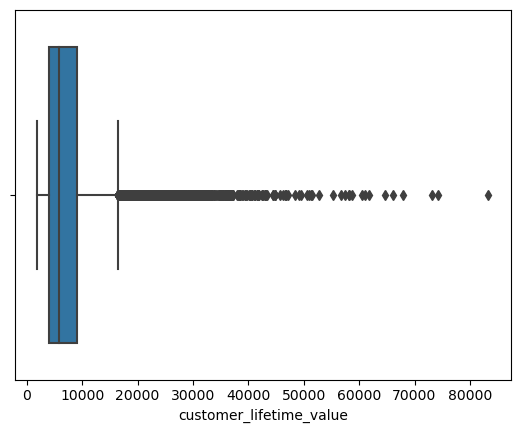

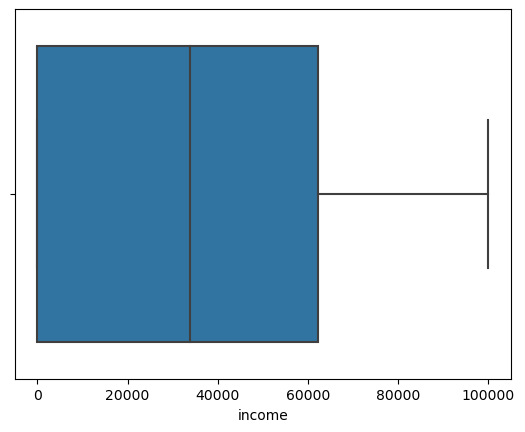

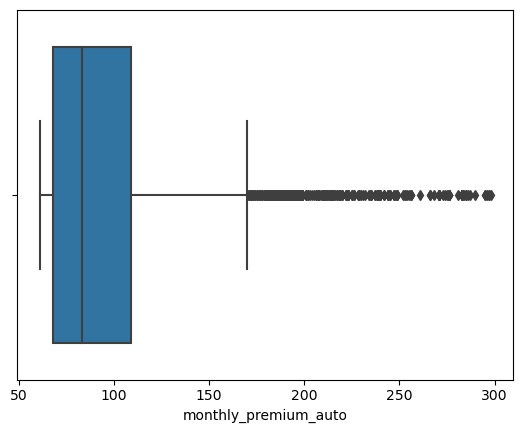

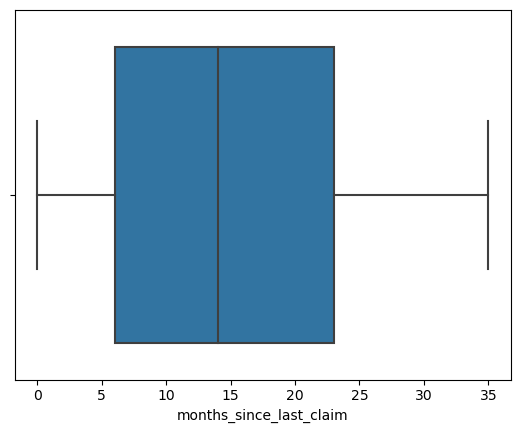

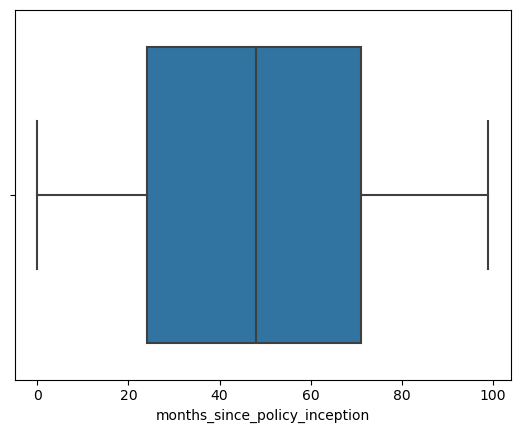

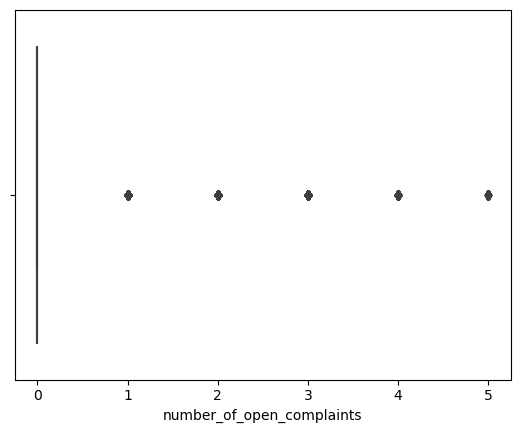

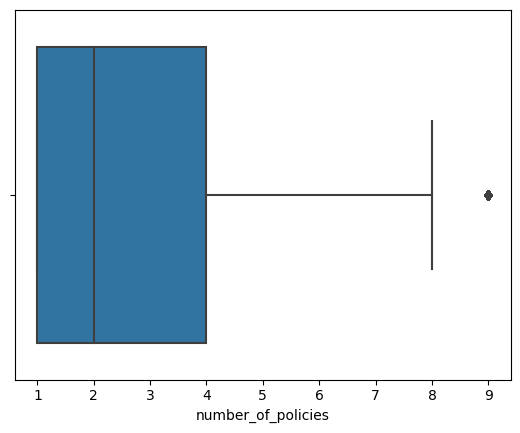

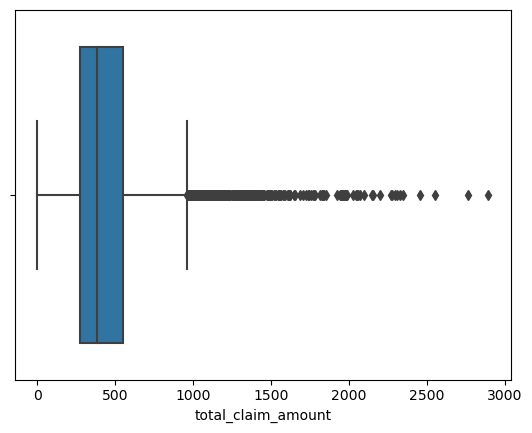

In [100]:
#Checking for outliers



def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(x=Dataframe[column])
        plt.show()
    return None
   

outlier(numerical_df)

In [101]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


Let's remove outliers from - 'monthly_premium_auto', 'customer_lifetime_value'

In [102]:
numerical_df = numerical_df.drop_duplicates(subset=['customer_lifetime_value'])

# Apply the outlier detection code again
Q1_cust_lifetime = numerical_df['customer_lifetime_value'].quantile(0.25)
Q3_cust_lifetime = numerical_df['customer_lifetime_value'].quantile(0.75)
IQR_cust_lifetime = Q3_cust_lifetime - Q1_cust_lifetime
IQR_threshold = 3.0

lower_bound = Q1_cust_lifetime - IQR_threshold * IQR_cust_lifetime
upper_bound = Q3_cust_lifetime + IQR_threshold * IQR_cust_lifetime

outliers_cust_lifetime = numerical_df[(numerical_df['customer_lifetime_value'] < lower_bound) | (numerical_df['customer_lifetime_value'] > upper_bound)]

print(outliers_cust_lifetime['customer_lifetime_value'])



8       24127.50402
50      36707.42639
51      33473.34946
63      24261.01777
79      58166.55351
           ...     
9034    43019.01278
9039    25093.57037
9049    32104.69957
9062    30205.01297
9097    30104.51969
Name: customer_lifetime_value, Length: 333, dtype: float64


In [103]:
# Apply the outlier detection code to the 'monthly_premium_auto' column
Q1_monthly_premium = numerical_df['monthly_premium_auto'].quantile(0.25)
Q3_monthly_premium = numerical_df['monthly_premium_auto'].quantile(0.75)
IQR_monthly_premium = Q3_monthly_premium - Q1_monthly_premium
IQR_threshold = 2.0

lower_bound_monthly_premium = Q1_monthly_premium - IQR_threshold * IQR_monthly_premium
upper_bound_monthly_premium = Q3_monthly_premium + IQR_threshold * IQR_monthly_premium

outliers_monthly_premium = numerical_df[(numerical_df['monthly_premium_auto'] < lower_bound_monthly_premium) | (numerical_df['monthly_premium_auto'] > upper_bound_monthly_premium)]

print(outliers_monthly_premium['monthly_premium_auto'])

31      237
123     192
181     217
196     255
248     245
       ... 
8920    199
8943    247
9026    213
9049    266
9103    195
Name: monthly_premium_auto, Length: 225, dtype: int64


In [104]:
numerical_df.shape

(8041, 8)

In [105]:
# Remove outliers for 'monthly_premium_auto'
numerical_df = numerical_df[(numerical_df['monthly_premium_auto'] >= lower_bound_monthly_premium) & (numerical_df['monthly_premium_auto'] <= upper_bound_monthly_premium)]

In [106]:
numerical_df.shape

(7816, 8)

2. Create a copy of the dataframe for the data wrangling.


In [107]:
data_wrangling_df = numerical_df.copy()


3. Normalize the continuous variables. You can use any one method you want.
we are not doing this

4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [108]:
categorical_df = df_customer.select_dtypes(include=['object', 'datetime64'])


In [109]:
categorical_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.


In [110]:
# Convert the datetime column to datetime format
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])

# Extract year, month, and day as new integer columns
categorical_df['year'] = categorical_df['effective_to_date'].dt.year
categorical_df['month'] = categorical_df['effective_to_date'].dt.month
categorical_df['day'] = categorical_df['effective_to_date'].dt.day

In [111]:
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,year,month,day
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011,2,24
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011,1,31
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011,2,19
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011,1,20
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011,2,3


Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

In [112]:
categorical_df.shape

(9134, 19)

In [113]:
categorical_df = pd.get_dummies(categorical_df, columns=['state'])

In [114]:
categorical_df

,customer,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,year,month,day,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington
0,BU79786,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2011,2,24,False,False,False,False,True
1,QZ44356,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,2011,1,31,True,False,False,False,False
2,AI49188,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,2011,2,19,False,False,True,False,False
3,WW63253,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,2011,1,20,False,True,False,False,False
4,HB64268,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2011,2,3,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,2011,2,10,False,True,False,False,False
9130,PK87824,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,...,Four-Door Car,Medsize,2011,2,12,False,True,False,False,False
9131,TD14365,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,2011,2,6,False,True,False,False,False
9132,UP19263,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,...,Four-Door Car,Large,2011,2,3,False,True,False,False,False


In [115]:
categorical_df.columns

Index(['customer', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'year', 'month', 'day',
       'state_Arizona', 'state_California', 'state_Nevada', 'state_Oregon',
       'state_Washington'],
      dtype='object')

In [116]:
df_customer['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [117]:
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size


categorical_df["coverage"] = categorical_df["coverage"].map({"Basic": 0, "Extended": 1, "Premium": 2})



In [127]:
print(categorical_df["renew_offer_type"].unique())

['Offer1' 'Offer3' 'Offer2' 'Offer4']


In [119]:
ordinal_mapping = {'Unemployed': 0, 'Employed': 1, 'Medical Leave': 2, 'Disabled': 3, 'Retired': 4}

categorical_df['employmentstatus'] = categorical_df['employmentstatus'].map(ordinal_mapping)

In [120]:
location_mapping = {'Rural': 0, 'Suburban': 1, 'Urban': 2}

categorical_df['location_code'] = categorical_df['location_code'].map(location_mapping)

In [121]:
vehicle_size_mapping = {'Small': 0, 'Medsize': 1, 'Large': 2}

categorical_df['vehicle_size'] = categorical_df['vehicle_size'].map(vehicle_size_mapping)

In [123]:
categorical_df = pd.get_dummies(categorical_df, columns=['marital_status'])


In [125]:
categorical_df = pd.get_dummies(categorical_df, columns=['policy_type'])

In [126]:
categorical_df = pd.get_dummies(categorical_df, columns=['policy'])

In [128]:
categorical_df = pd.get_dummies(categorical_df, columns=['renew_offer_type'])

In [129]:
categorical_df = pd.get_dummies(categorical_df, columns=['sales_channel'])

In [130]:
categorical_df.head()

,customer,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,vehicle_class,vehicle_size,...,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,BU79786,No,0,Bachelor,2011-02-24,1,F,1,Two-Door Car,1,...,False,False,True,False,False,False,True,False,False,False
1,QZ44356,No,1,Bachelor,2011-01-31,0,F,1,Four-Door Car,1,...,False,False,False,False,True,False,True,False,False,False
2,AI49188,No,2,Bachelor,2011-02-19,1,F,1,Two-Door Car,1,...,False,False,True,False,False,False,True,False,False,False
3,WW63253,No,0,Bachelor,2011-01-20,0,M,1,SUV,1,...,False,False,True,False,False,False,False,False,True,False
4,HB64268,No,0,Bachelor,2011-02-03,1,M,0,Four-Door Car,1,...,False,False,True,False,False,False,True,False,False,False


In [131]:
categorical_df.columns

Index(['customer', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'vehicle_class',
       'vehicle_size', 'year', 'month', 'day', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Corporate Auto',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L1', 'policy_Corporate L2', 'policy_Corporate L3',
       'policy_Personal L1', 'policy_Personal L2', 'policy_Personal L3',
       'policy_Special L1', 'policy_Special L2', 'policy_Special L3',
       'renew_offer_type_Offer1', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Agent', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web'],
      dtype='object')